In [1]:
import os
import sys
data_folder = os.path.join(os.path.expanduser("~"), "Data", "books")

In [2]:
# %load getdata.py
# Downloads the books and stores them in the below folder
import os
from time import sleep
import urllib.request

titles = {}


titles['burton'] = [4657, 2400, 5760, 6036, 7111, 8821,
                    18506, 4658, 5761, 6886, 7113]
titles['dickens'] = [24022, 1392, 1414, 1467, 2324, 580,
                     786, 888, 963, 27924, 1394, 1415, 15618,
                     25985, 588, 807, 914, 967, 30127, 1400,
                     1421, 16023, 28198, 644, 809, 917, 968, 1023,
                     1406, 1422, 17879, 30368, 675, 810, 924, 98,
                     1289, 1413, 1423, 17880, 32241, 699, 821, 927]
titles['doyle'] = [2349, 11656, 1644, 22357, 2347, 290, 34627, 5148,
                   8394, 26153, 12555, 1661, 23059, 2348, 294, 355,
                   5260, 8727, 10446, 126, 17398, 2343, 2350, 3070,
                   356, 5317, 903, 10581, 13152, 2038, 2344, 244, 32536,
                   423, 537, 108, 139, 2097, 2345, 24951, 32777, 4295,
                   7964, 11413, 1638, 21768, 2346, 2845, 3289, 439, 834]
titles['gaboriau'] = [1748, 1651, 2736, 3336, 4604, 4002, 2451,
                      305, 3802, 547]
titles['nesbit'] = [34219, 23661, 28804, 4378, 778, 20404, 28725,
                    33028, 4513, 794]
titles['tarkington'] = [1098, 15855, 1983, 297, 402, 5798,
                        8740, 980, 1158, 1611, 2326, 30092,
                        483, 5949, 8867, 13275, 18259, 2595,
                        3428, 5756, 6401, 9659]
titles['twain'] = [1044, 1213, 245, 30092, 3176, 3179, 3183, 3189, 74,
                   86, 1086, 142, 2572, 3173, 3177, 3180, 3186, 3192,
                   76, 91, 119, 1837, 2895, 3174, 3178, 3181, 3187, 3432,
                   8525]



assert len(titles) == 7

assert len(titles['tarkington']) == 22
assert len(titles['dickens']) == 44
assert len(titles['nesbit']) == 10
assert len(titles['doyle']) == 51
assert len(titles['twain']) == 29
assert len(titles['burton']) == 11
assert len(titles['gaboriau']) == 10


# https://www.gutenberg.org
#url_base = "http://gutenberg.pglaf.org/"
#url_base = "http://gutenberg.readingroo.ms/"
url_base = "http://www.gutenberg.myebook.bg/"
url_format = "{url_base}{idstring}/{id}/{id}.txt"

fixes = {}
fixes[1044] = url_base + "1/0/4/1044/1044-0.txt"
fixes[5148] = url_base + "5/1/4/5148/5148-0.txt"
fixes[4657] = "https://archive.org/stream/personalnarrativ04657gut/pnpa110.txt"
fixes[1467] = "https://archive.org/stream/somechristmassto01467gut/cdscs10p_djvu.txt"

# Make parent folder if not exists
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

for author in titles:
    print("Downloading titles from {author}".format(author=author))
    # Make author's folder if not exists
    author_folder = os.path.join(data_folder, author)
    if not os.path.exists(author_folder):
        os.makedirs(author_folder)
    # Download each title to this folder
    for bookid in titles[author]:
        if bookid in fixes:
            print(" - Applying fix to book with id {id}".format(id=bookid))
            url =  fixes[bookid]
        else:
            print(" - Getting book with id {id}".format(id=bookid))
            idstring = "/".join([str(bookid)[i] for i in range(len(str(bookid))-1)])
            print(bookid, idstring)
            url = url_format.format(url_base=url_base, idstring=idstring, id=bookid)
        print(" - " + url)
        filename = os.path.join(author_folder, "{id}.txt".format(id=bookid))
        if os.path.exists(filename):
            print(" - File already exists, skipping")
        else:
            urllib.request.urlretrieve(url, filename)
            sleep(60*5)
print("Download complete")

 - Getting book with id 1748
1748 1/7/4
 - http://www.gutenberg.myebook.bg/1/7/4/1748/1748.txt


KeyboardInterrupt: 

In [3]:
def clean_book(document):
    lines = document.split("\n")
    start= 0
    end = len(lines)
    for i in range(len(lines)):
        line = lines[i]
        if line.startswith("*** START OF THIS PROJECT GUTENBERG"):
            start = i + 1
        elif line.startswith("*** END OF THIS PROJECT GUTENBERG"):
            end = i - 1
    return "\n".join(lines[start:end])

In [4]:
import numpy as np

def load_books_data(folder=data_folder):
    documents = []
    authors = []
    subfolders = [subfolder for subfolder in os.listdir(folder)
                  if os.path.isdir(os.path.join(folder, subfolder))]
    for author_number, subfolder in enumerate(subfolders):
        full_subfolder_path = os.path.join(folder, subfolder)
        for document_name in os.listdir(full_subfolder_path):
            with open(os.path.join(full_subfolder_path, document_name)) as inf:
                documents.append(clean_book(inf.read()))
                authors.append(author_number)
    return documents, np.array(authors, dtype='int')

In [5]:
documents, classes = load_books_data(data_folder)

In [6]:
function_words = ["a", "able", "aboard", "about", "above", "absent",
                  "according" , "accordingly", "across", "after", "against",
                  "ahead", "albeit", "all", "along", "alongside", "although",
                  "am", "amid", "amidst", "among", "amongst", "amount", "an",
                    "and", "another", "anti", "any", "anybody", "anyone",
                    "anything", "are", "around", "as", "aside", "astraddle",
                    "astride", "at", "away", "bar", "barring", "be", "because",
                    "been", "before", "behind", "being", "below", "beneath",
                    "beside", "besides", "better", "between", "beyond", "bit",
                    "both", "but", "by", "can", "certain", "circa", "close",
                    "concerning", "consequently", "considering", "could",
                    "couple", "dare", "deal", "despite", "down", "due", "during",
                    "each", "eight", "eighth", "either", "enough", "every",
                    "everybody", "everyone", "everything", "except", "excepting",
                    "excluding", "failing", "few", "fewer", "fifth", "first",
                    "five", "following", "for", "four", "fourth", "from", "front",
                    "given", "good", "great", "had", "half", "have", "he",
                    "heaps", "hence", "her", "hers", "herself", "him", "himself",
                    "his", "however", "i", "if", "in", "including", "inside",
                    "instead", "into", "is", "it", "its", "itself", "keeping",
                    "lack", "less", "like", "little", "loads", "lots", "majority",
                    "many", "masses", "may", "me", "might", "mine", "minority",
                    "minus", "more", "most", "much", "must", "my", "myself",
                    "near", "need", "neither", "nevertheless", "next", "nine",
                    "ninth", "no", "nobody", "none", "nor", "nothing",
                    "notwithstanding", "number", "numbers", "of", "off", "on",
                    "once", "one", "onto", "opposite", "or", "other", "ought",
                    "our", "ours", "ourselves", "out", "outside", "over", "part",
                    "past", "pending", "per", "pertaining", "place", "plenty",
                    "plethora", "plus", "quantities", "quantity", "quarter",
                    "regarding", "remainder", "respecting", "rest", "round",
                    "save", "saving", "second", "seven", "seventh", "several",
                    "shall", "she", "should", "similar", "since", "six", "sixth",
                    "so", "some", "somebody", "someone", "something", "spite",
                    "such", "ten", "tenth", "than", "thanks", "that", "the",
                    "their", "theirs", "them", "themselves", "then", "thence",
                  "therefore", "these", "they", "third", "this", "those",
"though", "three", "through", "throughout", "thru", "thus",
"till", "time", "to", "tons", "top", "toward", "towards",
"two", "under", "underneath", "unless", "unlike", "until",
"unto", "up", "upon", "us", "used", "various", "versus",
"via", "view", "wanting", "was", "we", "were", "what",
"whatever", "when", "whenever", "where", "whereas",
"wherever", "whether", "which", "whichever", "while",
                  "whilst", "who", "whoever", "whole", "whom", "whomever",
"whose", "will", "with", "within", "without", "would", "yet",
"you", "your", "yours", "yourself", "yourselves"]

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
extractor = CountVectorizer(vocabulary=function_words)

In [8]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

In [9]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
grid = grid_search.GridSearchCV(svr, parameters)

In [10]:
pipeline1 = Pipeline([('feature_extraction', extractor),
                      ('clf', grid)
                     ])

In [11]:
scores = cross_val_score(pipeline1, documents, classes,
scoring='f1')

/usr/lib/python3/dist-packages/scipy/sparse/compressed.py:119: UserWarning: indptr array has non-integer dtype (float64)
  % self.indptr.dtype.name)
/usr/local/lib/python3.4/dist-packages/sklearn/metrics/metrics.py:1771: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
print(np.mean(scores))

0.812103970357


In [13]:
pipeline = Pipeline([('feature_extraction',
CountVectorizer(analyzer='char', ngram_range=(3, 3))),
('classifier', grid)
])
scores = cross_val_score(pipeline, documents, classes,
scoring='f1')
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.818


In [14]:
enron_data_folder = os.path.join(os.path.expanduser("~"), "Data",
"enron_mail_20110402", "maildir")

In [15]:
from email.parser import Parser
p = Parser()

In [16]:
from sklearn.utils import check_random_state

In [17]:
def get_enron_corpus(num_authors=10, data_folder=data_folder,
                     min_docs_author=10, max_docs_author=100,
                     random_state=None):
    random_state = check_random_state(random_state)
    email_addresses = sorted(os.listdir(data_folder))
    random_state.shuffle(email_addresses)
    documents = []
    classes = []
    author_num = 0
    authors = {}
    for user in email_addresses:
        users_email_folder = os.path.join(data_folder, user)
        mail_folders = [os.path.join(users_email_folder, subfolder)
                        for subfolder in os.listdir(users_email_folder)
                        if "sent" in subfolder]
        try:
            authored_emails = [open(os.path.join(mail_folder, email_filename), encoding='cp1252').read()
                               for mail_folder in mail_folders
                               for email_filename in os.listdir(mail_folder)]
        except IsADirectoryError:
            continue
        if len(authored_emails) < min_docs_author:
            continue
        if len(authored_emails) > max_docs_author:
            authored_emails = authored_emails[:max_docs_author]
        contents = [p.parsestr(email)._payload for email in authored_emails]
        documents.extend(contents)
        classes.extend([author_num] * len(authored_emails))
        authors[user] = author_num
        author_num += 1
        if author_num >= num_authors or author_num >= len(email_addresses):
            break
    return documents, np.array(classes), authors

In [18]:
documents, classes, authors = get_enron_corpus(data_folder=enron_data_folder, random_state=14)

In [19]:
documents[100]

'I am disappointed on the timing but I understand.  Thanks.  Mark\n\n -----Original Message-----\nFrom: \tGreenberg, Mark  \nSent:\tFriday, September 28, 2001 4:19 PM\nTo:\tHaedicke, Mark E.\nSubject:\tWeb Site\n\nMark -\n\nFYI - I have attached below a screen shot of the proposed new look and feel for the site.  We have a couple of tweaks to make, but I believe this is a much cleaner look than what we have now.\n\nUnfortunately, because of the virus we lost a good part of development time last week.  This has pushed back the completion schedule at this time by at least a week, which means that the site will not be updated and operational by the time the law conference comes along.  If you want information about the site disseminated, I can provide an overview of the new look and feel and new functions that we anticipate having.  I believe a new target release date is realistically Nov. 1.\n\nPlease let me know if you should need anything further.\n\nMark\n\n\n << File: lg-0928-withmen

In [20]:
import quotequail

In [21]:
def remove_replies(email_contents):
    r = quotequail.unwrap(email_contents)
    if r is None:
        return email_contents
    if 'text_top' in r:
        return r['text_top']
    elif 'text' in r:
        return r['text']
    return email_contents

In [22]:
documents = [remove_replies(document) for document in documents]

In [23]:
scores = cross_val_score(pipeline, documents, classes, scoring='f1')
print("Score: {:.3f}".format(np.mean(scores)))

Score: 0.523


In [24]:
from sklearn.cross_validation import train_test_split
training_documents, testing_documents, y_train, y_test = train_test_split(documents, classes, random_state=14)

In [25]:
pipeline.fit(training_documents, y_train)
y_pred = pipeline.predict(testing_documents)

In [26]:
print(pipeline.named_steps['classifier'].best_params_)

{'C': 1, 'kernel': 'linear'}


In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm = cm / cm.astype(np.float).sum(axis=1)
sorted_authors = sorted(authors.keys(), key=lambda x:authors[x])

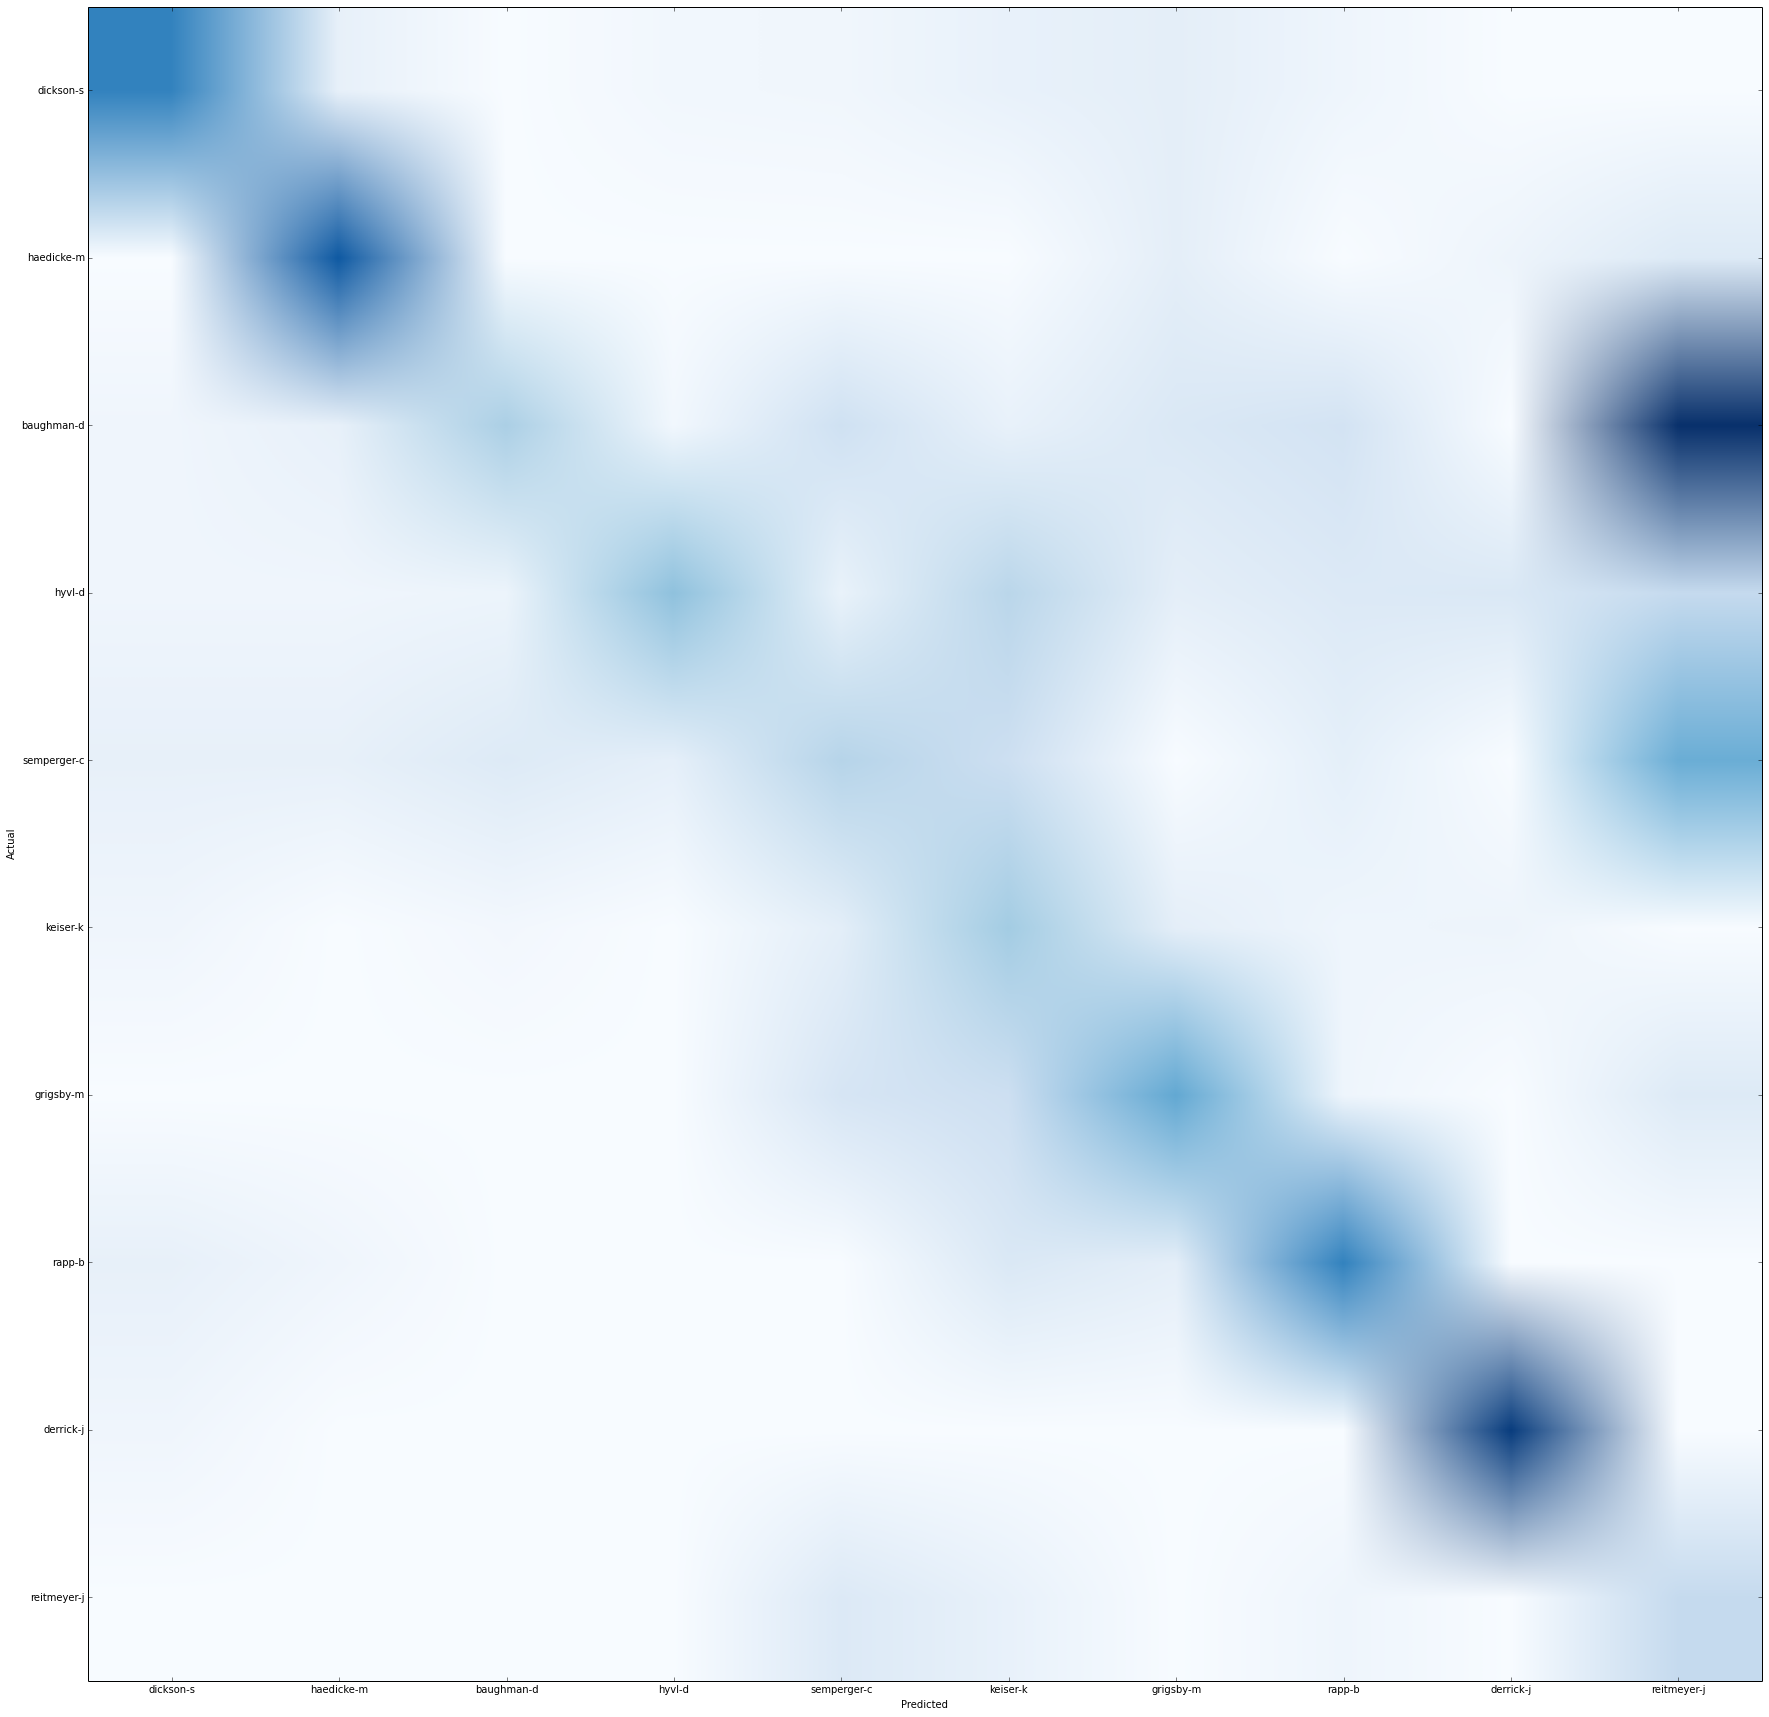

In [28]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(30, 30))
plt.imshow(cm, cmap='Blues')
tick_marks = np.arange(len( sorted_authors ))
plt.xticks(tick_marks, sorted_authors )
plt.yticks(tick_marks, sorted_authors )
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()